# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # For map visualization
from folium.plugins import MarkerCluster

# Load dataset

In [2]:
# Load dataset
df = pd.read_csv("Dataset .csv")

In [3]:
# Display the first few rows to check the data
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Geospatial Analysis

###  Visualizing Restaurant Locations on a Map

In [10]:
import folium
from folium.plugins import MarkerCluster

# Calculate the map center
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(restaurant_map)
for _, row in df.iterrows():
    tooltip_text = (f"<b>{row['Restaurant Name']}</b><br>"
                    f"City: {row['City']}<br>"
                    f"Rating: {row['Aggregate rating']}<br>"
                    f"Cuisine: {row.get('Cuisines', 'N/A')}")
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=tooltip_text,
        tooltip="Click here to see details"
    ).add_to(marker_cluster)

# Save the map to an HTML file
restaurant_map.save("restaurant_map.html")

restaurant_map


# Distribution of Restaurants Across Cities and Countries

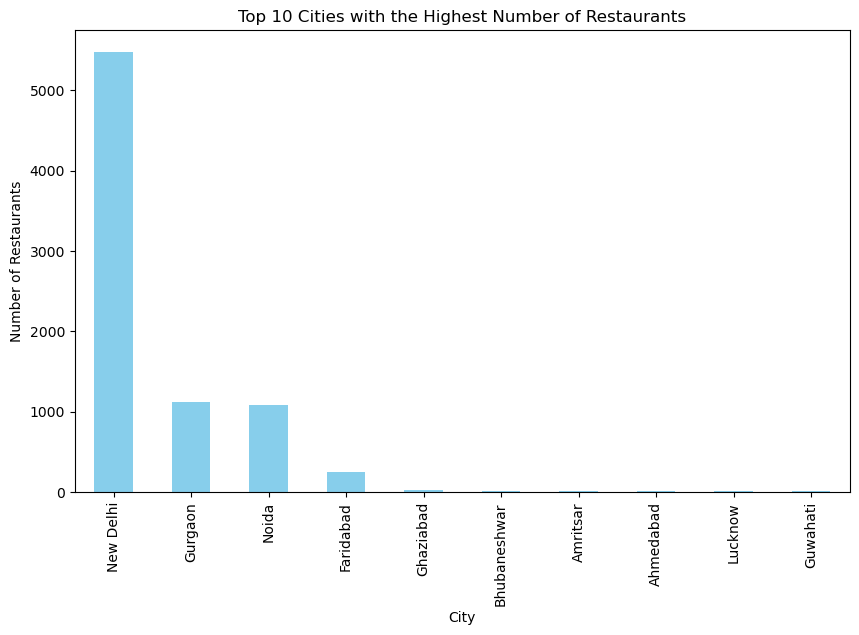

In [6]:
plt.figure(figsize=(10, 6))
df['City'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

# Country Distribution

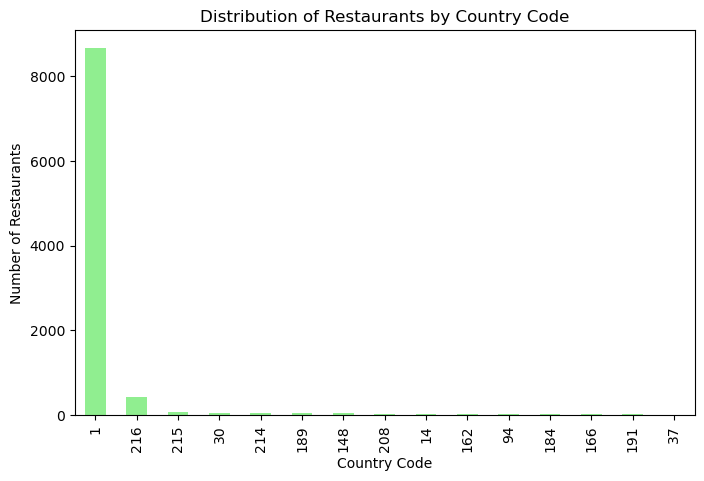

In [7]:
plt.figure(figsize=(8, 5))
df['Country Code'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Restaurants by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.show()

# Correlation Between Location and Rating

### Scatter Plot: Latitude vs. Rating

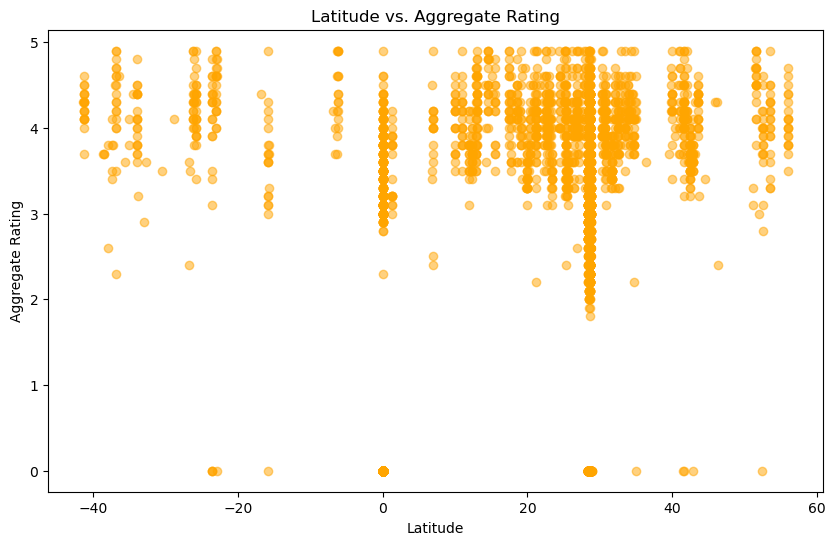

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Latitude'], df['Aggregate rating'], alpha=0.5, color='orange')
plt.title('Latitude vs. Aggregate Rating')
plt.xlabel('Latitude')
plt.ylabel('Aggregate Rating')
plt.show()

### Scatter Plot: Longitude vs. Rating

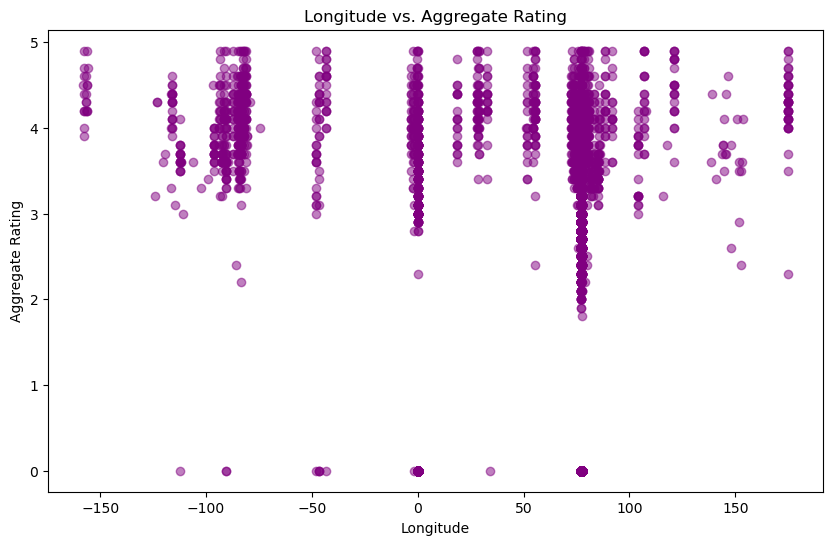

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Aggregate rating'], alpha=0.5, color='purple')
plt.title('Longitude vs. Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Aggregate Rating')
plt.show()